<a href="https://colab.research.google.com/github/Soundflog/MLMedicine/blob/main/computer_vision/COI_Practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_path = 'Practika_1_RGB.m'
encoding = 'cp1251'

try:
    with open(file_path, 'r', encoding=encoding) as f:
        content = f.read()
        print(content)
except FileNotFoundError:
    print(f"Ошибка: Файл '{file_path}' не найден. Пожалуйста, убедитесь, что файл загружен в среду Colab.")
except Exception as e:
    print(f"Произошла ошибка при чтении файла: {e}")

%считывание и запись в формате bmp-24 разряда 
a = imread('E:\initial.jpg');
figure, imshow(a), title('initial.jpg');
%разбиение изображения на матрицы
R=a(:,:,1);
G=a(:,:,2);
B=a(:,:,3);
figure, imshow(R), title('initial_R');
figure, imshow(G), title('initial_G');
figure, imshow(B), title('initial_B');
imwrite(R,'R.bmp'); 
imwrite(B,'B.bmp'); 
imwrite(G,'G.bmp'); 
%--------------------------------------------------------------------------
%РАЗЛОЖЕНИЕ КОМПОНЕНТЫ R
[R]=dec2bin(R);
R=double(R);
R=R-48;
kg=1279;
kv=885;

%первая битовая плоскость компоненты R
l=1; 
for  m=1:kg;
   for n=1:kv; 
      R1(n, m)= R(l,1);
             l=l+1;
       end   
end   
   R1(n, m)= R(l-1,1);
imwrite(R1,'1_R1.bmp');
figure, imshow(R1), title('1_R1');
%вторая битовая плоскость компоненты R
l=1;
for  m=1:kg;
   for n=1:kv;  
      R2(n, m)= R(l,2);
             l=l+1;
       end   
end   
   R2(n, m)= R(l-1,2);
imwrite(R2,'2_R2.bmp');
figure, imshow(R2), title('2_R2');
%---------------------------------

Saving deprived24.jpg to deprived24.jpg


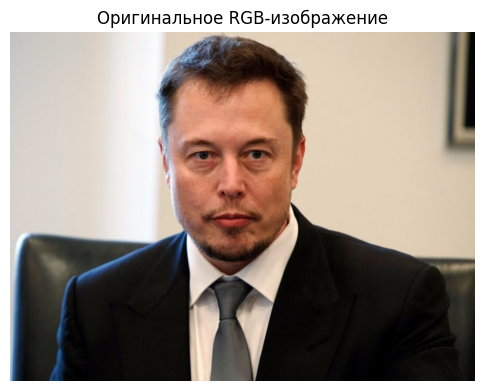

In [ ]:
#@title Импорт и загрузка изображения (PNG/JPG)
import numpy as np
import matplotlib.pyplot as plt

# Для цветовых конвертаций возьмём skimage (корректные модели и диапазоны)
!pip -q install scikit-image
from skimage import io, img_as_ubyte
from skimage.color import rgb2ycbcr, rgb2hsv

# В Colab можно загрузить файл вручную
from google.colab import files
uploaded = files.upload()  # выбери файл с изображением

# Получим имя загруженного файла
fname = next(iter(uploaded.keys()))
img = io.imread(fname)  # (H, W, C)

# Если в изображении есть альфа-канал (RGBA) — отбросим его
if img.ndim == 3 and img.shape[2] == 4:
    img = img[..., :3]

# Приведём к uint8 (0..255), если пришло float
if img.dtype != np.uint8:
    img_uint8 = img_as_ubyte(img)
else:
    img_uint8 = img

# Убедимся, что это RGB (иногда io.imread уже даёт RGB)
rgb = img_uint8

plt.figure(figsize=(6,6))
plt.title("Оригинальное RGB-изображение")
plt.axis("off")
plt.imshow(rgb)
plt.show()


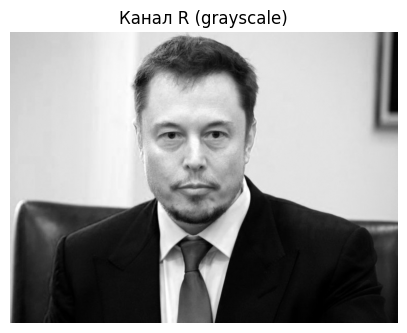

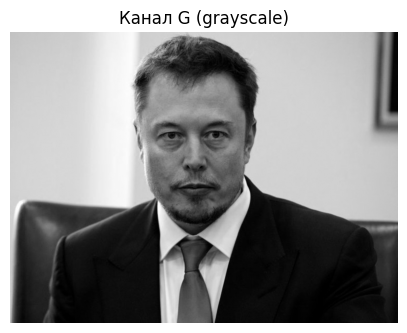

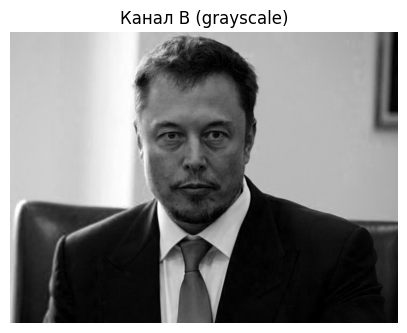

In [ ]:
#@title Разложение на каналы R, G, B (полутоновые)
R = rgb[..., 0]
G = rgb[..., 1]
B = rgb[..., 2]

def show_gray(img2d, title):
    plt.figure(figsize=(5,5))
    plt.title(title)
    plt.axis("off")
    plt.imshow(img2d, cmap="gray", vmin=0, vmax=255)
    plt.show()

show_gray(R, "Канал R (grayscale)")
show_gray(G, "Канал G (grayscale)")
show_gray(B, "Канал B (grayscale)")


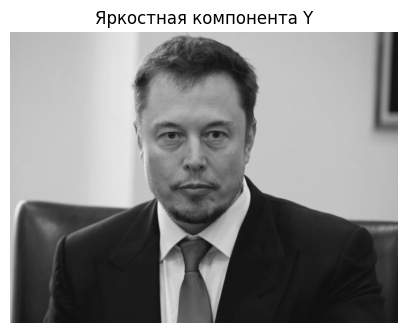

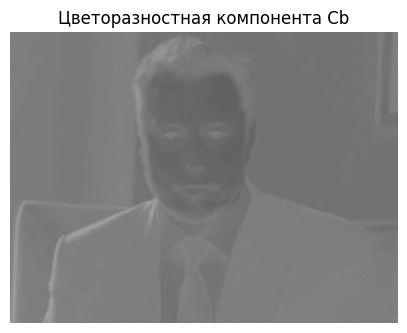

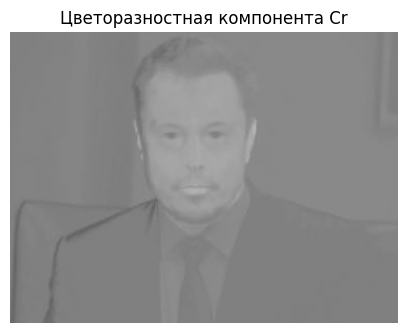

Диапазоны каналов (мин/макс):
Y : 16 .. 235
Cb: 97 .. 165
Cr: 96 .. 184


In [ ]:
#@title RGB → YCbCr и каналы Y, Cb, Cr
# skimage ожидает float в [0, 1]
rgb_float = rgb.astype(np.float32) / 255.0

ycbcr = rgb2ycbcr(rgb_float)  # float, уровни около (16..235/240)
Y = np.clip(ycbcr[..., 0], 0, 255).astype(np.uint8)
Cb = np.clip(ycbcr[..., 1], 0, 255).astype(np.uint8)
Cr = np.clip(ycbcr[..., 2], 0, 255).astype(np.uint8)

show_gray(Y,  "Яркостная компонента Y")
show_gray(Cb, "Цветоразностная компонента Cb")
show_gray(Cr, "Цветоразностная компонента Cr")

print("Диапазоны каналов (мин/макс):")
print(f"Y : {Y.min()} .. {Y.max()}")
print(f"Cb: {Cb.min()} .. {Cb.max()}")
print(f"Cr: {Cr.min()} .. {Cr.max()}")


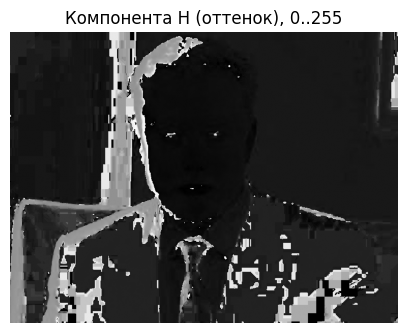

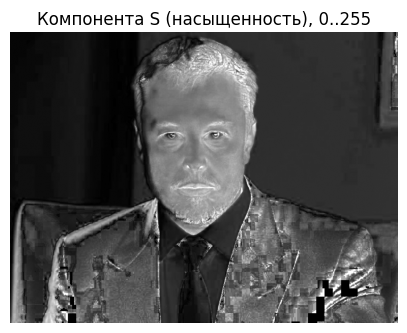

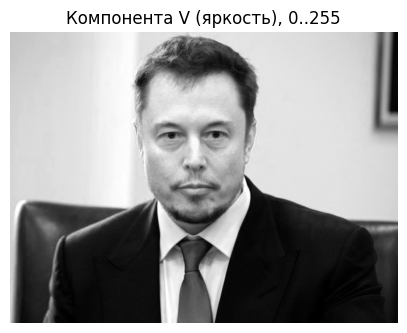

In [ ]:
#@title RGB → HSV и каналы H, S, V (как grayscale)
hsv = rgb2hsv(rgb_float)  # float, H,S,V ∈ [0,1]
H = (hsv[..., 0] * 255.0).astype(np.uint8)  # hue по кругу → 0..255
S = (hsv[..., 1] * 255.0).astype(np.uint8)
V = (hsv[..., 2] * 255.0).astype(np.uint8)

show_gray(H, "Компонента H (оттенок), 0..255")
show_gray(S, "Компонента S (насыщенность), 0..255")
show_gray(V, "Компонента V (яркость), 0..255")


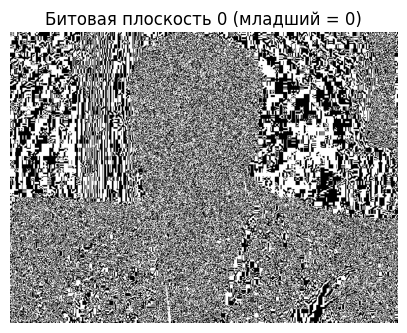

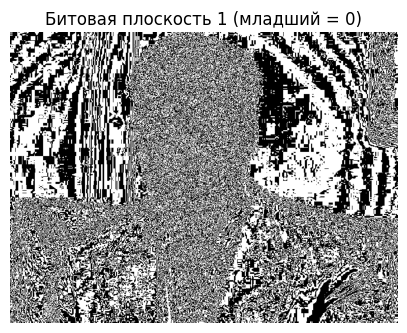

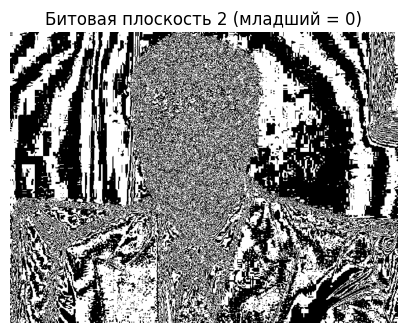

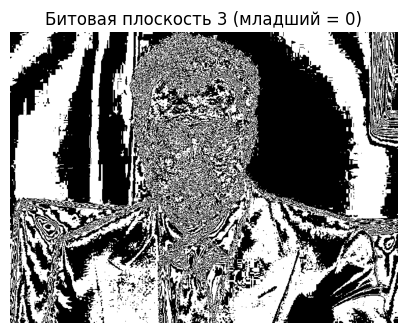

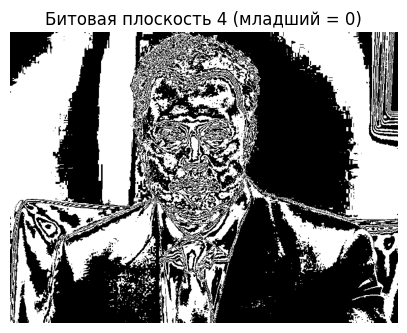

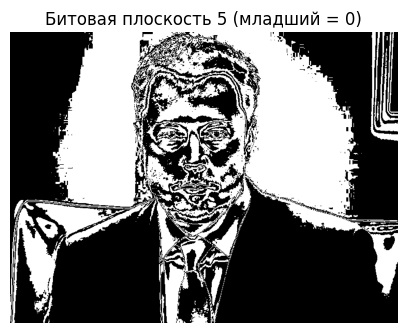

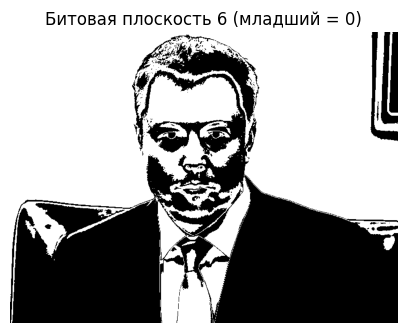

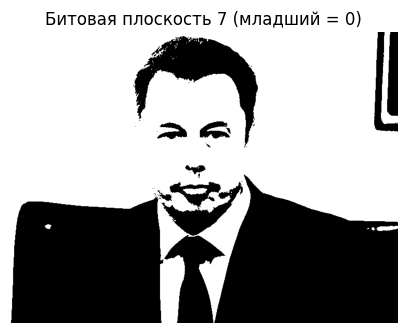

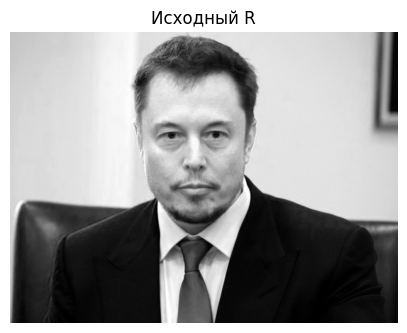

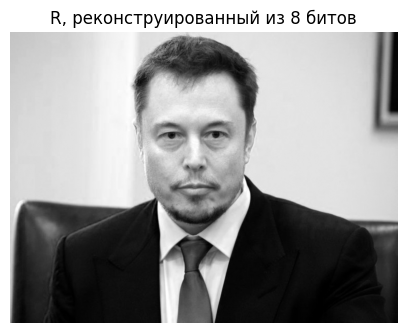

In [ ]:
#@title Битовые плоскости для канала R
g = 8  #@param {type:"slider", min:1, max:8, step:1}

bitplanes = []
for bit in range(g):
    plane = ((R >> bit) & 1) * 255  # двоичная карта этого бита, как 0/255
    bitplanes.append(plane.astype(np.uint8))
    show_gray(plane, f"Битовая плоскость {bit} (младший = 0)")

# (Необязательно) Визуально проверить реконструкцию из всех g битов:
reconstructed = np.zeros_like(R, dtype=np.uint16)
for bit in range(g):
    reconstructed += ((bitplanes[bit] // 255) << bit).astype(np.uint16)
reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)

# Сравним исходный R и реконструированный из g битов
show_gray(R, "Исходный R")
show_gray(reconstructed, f"R, реконструированный из {g} битов")
